# Predictive Models for Dairy Farm Risk Management

**Project Objective:**

The primary goal of this project is to analyze data from a dairy farm and create two predictive models to enhance business risk management. To achieve this, the following steps will be performed:
- Pre-processing of data.
- Exploratory analysis.
- Data preparation for machine learning.
- Model selection and training algorithm.
- Training, setting, testing, and checking model quality.
- Forecast and conclusions.

Considering the customer’s business objectives, two predictive models will be created:

1. The first model will predict the potential milk yield of the cow *(linear regression task)*.
2. The second model will calculate the probability of obtaining high-quality milk from a cow *(logistic regression task for binary classification)*.

**Data Source:**

The dataset consists of three files containing information on the current herd, cow producers, and EcoFarm cows. The format and structure of these files will be thoroughly explored, and any considerations regarding data quality will be addressed.

**Tools and libraries:**
- Python
- Pandas
- Matplotlib
- Numpy
- Sklearn
- Seaborn
- Math
- Phik

# Прогнозные модели для управления рисками в фермерском бизнесе

**Аннотация проекта** 

На данных фермерского хозяйства проводится исследовательский анализ с последующей разработкой двух прогнозных моделей для управления рисками в бизнесе.

**Цель исследования** — разработать модель машинного обучения, которая поможет фермерскому хозяйству управлять рисками и принимать объективные решения для развития бизнеса, в частности, расширении поголовья молочного скота. Для этого будут выполнены следующие шаги:

- Предварительная обработка данных.
- Исследовательский анализ.
- Подготовка данных для машинного обучения.
- Выбор модели и алгоритма её обучения.
- Обучение, настройка, тестирование и проверка качества моделей. 
- Прогноз и выводы.


Учитывая бизнес-задачи заказчика, предстоит создать две прогнозные модели для отбора молочного скота в поголовье:

1. Первая будет прогнозировать возможный удой коровы *(задача линейной регрессии)*.
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы *(задача логистической регресси для бинарной классификации)*.

**Описание данных**

Датасет представлен тремя разными файлами с информацией о стаде фермера на текущий момент, производителе каждой коровы в стаде фермера, и данные о коровах «ЭкоФермы», которых заказчик хочет изучить перед покупкой.


**Инструменты и библиотеки:**
- Python
- Pandas
- Matplotlib
- Numpy
- Sklearn
- Seaborn
- Math
- Phik

In [95]:
# импорт библиотек, модулей и функций
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import phik

# модуль статистического анализа
from scipy import stats as st

# функция для разделения датасета на выборки
from sklearn.model_selection import train_test_split
# класс для масштабирования стандартизацией
from sklearn.preprocessing import StandardScaler
# класс для прямого кодирования
from sklearn.preprocessing import OneHotEncoder
# класс LinearRegression
from sklearn.linear_model import LinearRegression
# класс LogisticRegression
from sklearn.linear_model import LogisticRegression

# импорт функций для расчёта метрик
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix
)

In [96]:
# установим настройки для отображения всех столбцов датафрейма
pd.set_option('display.max_columns', None)

### Шаг 1. Загрузка и изучение данных

Данные представлены тремя разными файлами:
1. Информация о стаде фермера на текущий момент.
2. Информация о производителе каждой коровы в стаде фермера.
3. Информация о коровах «ЭкоФермы», которых заказчик хочет изучить перед покупкой.

Создадим функции, чтобы нивелировать повторяющиеся действия при выводе основной информации и проверке данных на дубликаты и пустые значения.

In [97]:
# определим функцию data_info() для вывода основной информации
def data_info(data):
    data.info()
    display(data.head())

In [98]:
# определим функцию data_isnull_isdup() для проверки на дубликаты и пустые значения
def data_isnull_isdup(data):
    print('Количество явных дубликатов:', data.duplicated().sum())
    print('Количество пропусков:')
    print(data.isnull().sum())

In [99]:
# считываем данные из csv-файлов и сохраняем в соответствующие датафреймы
# в аргументе sep укажем какими символами разделять колонки
df_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';')
df_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';')
df_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';')

Изучим общую информацию о каждом датафрейме.

**Информация о стаде фермера на текущий момент**

In [100]:
# вызовем функцию data_info()
data_info(df_main)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


- В таблице 12 столбцов, три из которых имеют числовой тип данных. 
- При этом числовые значения в других четырёх столбцах — `ЭКЕ`, `СПО`, `Жирность` и `Белок` имеют тип object.
- Названия колонок не соответствуют единому стилю.
- Количество значений в столбцах не различается.

**Информация о производителе каждой коровы в стаде фермера**

In [101]:
# вызовем функцию data_info()
data_info(df_dad)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


- В таблице две колонки со значениями типа int64 — уникальный идентификатор коровы, и object — имя производителя.
- Названия колонок не соответствуют принятому стилю.
- Количество значений в столбцах не различается.

**Информация о коровах «ЭкоФермы»**

In [102]:
# вызовем функцию data_info()
data_info(df_buy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


- В таблице 7 столбцов, все содержат значения типа object. 
- При этом наблюдаются числовые значения в двух столбцах — `Текущая_жирность` и `Текущий_уровень_белок`.
- Названия колонок не соответствуют единому стилю.
- Количество значений в столбцах не различается.

**Вывод:** 

Основываясь на предварительном обзоре датафреймов отметим следующее:
- Объёма данных достаточно для дальнейшего исследования.
- Количество значений в столбцах не различается. Значит, в данных нет пропущенных значений. 
- Названия колонок отличаются по стилю и не соответствуют единообразию.
- Значения в некоторых столбцах следует привести к числовому типу для исключения возможных ошибок при анализе.

В этой связи, для дальнейшего анализа необходима предварительная обработка.

###  Шаг 2. Предобработка данных

Проверим данные на наличие пропусков и дубликатов. Рассмотрим корректность типов данных у каждого признака. При необходимости устраним все проблемы.

**Датасет — Информация о стаде фермера на текущий момент**

In [103]:
# перечень названий столбцов таблицы df_main
df_main.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [104]:
# переименуем столбцы, чтобы сделать названия более читабельными и единообразными
df_main = df_main.rename(columns={
    'Удой, кг': 'удой',
    'ЭКЕ (Энергетическая кормовая единица)': 'эке',
    'Сырой протеин, г': 'протеин',
    'СПО (Сахаро-протеиновое соотношение)': 'спо',
    'Порода': 'порода',
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы_быка',
    'Жирность,%': 'жирность',
    'Белок,%': 'белок',
    'Вкус молока': 'вкус_молока',
    'Возраст': 'возраст'
})

In [105]:
# убедимся, что изменения выполнены корректно
df_main.columns

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

На предыдущем шаге общей оценки данных было обнаружено, что числовые значения в четырёх столбцах датафрейма — `эке`, `спо`, `жирность` и `белок` имеют тип object.
- Столбец `эке`содержит числовые значения, представляющие единицу энергии (питательность корма).
- Столбец `спо` содержит числовые значения, представляющие отношение сахара к протеину в корме коровы.
- Столбцы `жирность` и `белок` представляют проценты содержания жиров и белков в молоке.

Преобразование этих столбцов в соответствующие числовые типы данных облегчит выполнение математических операций, агрегирование данных и последующий анализ признаков.

In [106]:
# преобразуем типы данных в столбцах в числовой
df_main['эке'] = df_main['эке'].str.replace(',', '.').astype(float)
df_main['спо'] = df_main['спо'].str.replace(',', '.').astype(float)
df_main['жирность'] = df_main['жирность'].str.replace(',', '.').astype(float)
df_main['белок'] = df_main['белок'].str.replace(',', '.').astype(float)

In [107]:
# вызовем функцию data_isnull_isdup() и оценим есть ли пропуски и дубликаты 
data_isnull_isdup(df_main)

Количество явных дубликатов: 5
Количество пропусков:
id                  0
удой                0
эке                 0
протеин             0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность            0
белок               0
вкус_молока         0
возраст             0
dtype: int64


В столбцах не обнаружено пропущенных значений. Вместе с тем есть явные дубликаты, от которых следует избавиться.

In [108]:
# удаление дубликатов
df_main = df_main.drop_duplicates()

In [109]:
# просмотр уникальных названий пастбищ
df_main['тип_пастбища'].sort_values().unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

Очевидны неявные дубликаты в названии пастбищ.

In [110]:
# избавимся от неявных дубликатов названий при помощи метода replace()
df_main['тип_пастбища'] = df_main['тип_пастбища'].replace('Равнинные', 'Равнинное')

In [111]:
# приведём названия пастбищ в столбце к строчному формату
df_main['тип_пастбища'] = df_main['тип_пастбища'].str.lower()

In [112]:
# просмотр уникальных названий породы производителей коров
df_main['порода_папы_быка'].sort_values().unique()

array(['Айдиал', 'Айдиалл', 'Соверин'], dtype=object)

In [113]:
# избавимся от неявных дубликатов названий при помощи метода replace()
df_main['порода_папы_быка'] = df_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')

In [114]:
# вывод описательных статистик
df_main.describe()

,id,удой,эке,протеин,спо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Столбцы с преобразованными типами значений теперь отображаются и в описательных статистиках датафрейма. Почти у всех признаков реалистичные описания. Однако, максимальное значение признака `удой` равное 45616 килограммов молока, которые корова даёт в год, выглядит аномально высоким.

In [115]:
# вывод строк, в которых значения признака удой_кг больше или равны 10000
df_main[df_main['удой'] >= 10000]

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


По всей видимости это единственная строка в датафрейме, которая содержит аномально высокие значения признака.

In [116]:
# удаление строки, в которой значение признака удой_кг равно 45616
df_main = df_main[df_main['удой'] != 45616]

In [117]:
# посмотрим описательные статистики и убедимся, что аномалий нет
df_main.describe()

,id,удой,эке,протеин,спо,жирность,белок
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Теперь данные выглядят корректно и более равномерно.

**Датасет — Информация о производителе каждой коровы в стаде фермера**

In [118]:
# перечень названий столбцов таблицы df_dad
df_dad.columns

Index(['id', 'Имя Папы'], dtype='object')

In [119]:
# переименуем столбец отличающийся по стилю
df_dad = df_dad.rename(columns = {'Имя Папы': 'имя_папы'})

In [120]:
# вызовем функцию data_isnull_isdup() и оценим есть ли пропуски и дубликаты 
data_isnull_isdup(df_dad)

Количество явных дубликатов: 0
Количество пропусков:
id          0
имя_папы    0
dtype: int64


Пропущенных значений и дубликатов не обнаружено.

In [121]:
# рассмотрим значения в столбце
df_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Таблица содержит категориальные значения с именами производителей каждой коровы в стаде фермера.

**Датасет — Информация о коровах «ЭкоФермы»**

In [122]:
# перечень названий столбцов таблицы df_dad
df_buy.columns

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')

In [123]:
# переименуем столбцы, чтобы сделать названия более читабельными и единообразными
df_buy = df_buy.rename(columns={
    'Порода': 'порода',
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы_быка',
    'Имя_папы': 'имя_папы',
    'Текущая_жирность,%': 'жирность',
    'Текущий_уровень_белок,%': 'белок',
    'Возраст': 'возраст'
})

In [124]:
# убедимся, что изменения выполнены корректно
df_buy.columns

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'жирность',
       'белок', 'возраст'],
      dtype='object')

На предыдущем шаге общей оценки данных было обнаружено, что числовые значения в двух столбцах датафрейма — `жирность` и `белок` имеют тип object. Столбцы представляют проценты содержания жиров и белков в молоке.

Для последующего корректного анализа признаков, приведём значения столбцов в соответствующие числовые типы данных.

In [125]:
# преобразуем типы данных в столбцах в числовой
df_buy['жирность'] = df_buy['жирность'].str.replace(',', '.').astype(float)
df_buy['белок'] = df_buy['белок'].str.replace(',', '.').astype(float)

In [126]:
# вызовем функцию data_isnull_isdup() и оценим есть ли пропуски и дубликаты 
data_isnull_isdup(df_buy)

Количество явных дубликатов: 4
Количество пропусков:
порода              0
тип_пастбища        0
порода_папы_быка    0
имя_папы            0
жирность            0
белок               0
возраст             0
dtype: int64


В столбцах не обнаружено пропущенных значений. Вместе с тем есть явные дубликаты, от которых следует избавиться.

In [127]:
# удаление дубликатов
df_buy = df_buy.drop_duplicates()

In [128]:
# вывод описательных статистик
df_buy.describe()

,жирность,белок
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


Столбцы с преобразованными типами значений теперь отображаются и в описательных статистиках датафрейма. Описания признаков выглядят адекватно и не вызывают подозрений.

**Вывод:**

На подготовительном этапе мы изучили основные сведения о датафрейме с последующей предобработкой:
- определили количество и тип данных в таблицах
- привели названия столбцов к единому стилю
- проверили данные на наличие пропусков и дубликатов
- избавились от явных аномалий и дубликатов
- преобразовали столбцы с числовыми данными из типа object в соответствующие числовые типы
- убедились, что все данные отображаются корректно

В таком виде данные готовы к более подробному исследовательскому анализу.

### Шаг 3. Исследовательский анализ данных

На данном этапе проведём статистический анализ всех признаков, построим графики и оценим особенности распределения количественных признаков.

**Проведём анализ категориальных признаков таблицы с данными о стаде фермера.**

In [129]:
# выведем число уникальных значений в каждом из категориальных столбцов
cat_col_main = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
df_main[cat_col_main].nunique()

порода              2
тип_пастбища        2
порода_папы_быка    2
вкус_молока         2
возраст             2
dtype: int64

В данных пять категориальных признаков, в каждом по две категории.

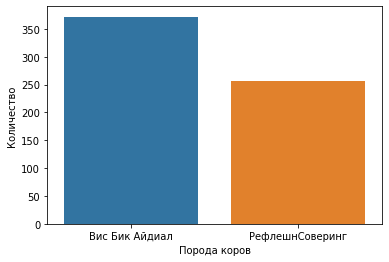

In [130]:
# построим гистограмму, чтобы визуализировать количество каждой породы
sns.countplot(x='порода', data=df_main)
plt.xlabel('Порода коров')
plt.ylabel('Количество')
plt.show()

В стаде фермера порода *Викс Бик Айдиал* преобладает над *РефлешнСоверинг*.

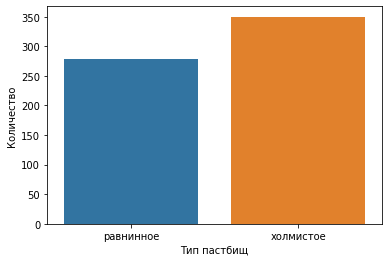

In [131]:
# построим гистограмму, чтобы показать распределение типов пастбищ
sns.countplot(x='тип_пастбища', data=df_main)
plt.xlabel('Тип пастбищ')
plt.ylabel('Количество')
plt.show()

В стаде фермера скот пасётся преимущественно на холмистых пастбищах.

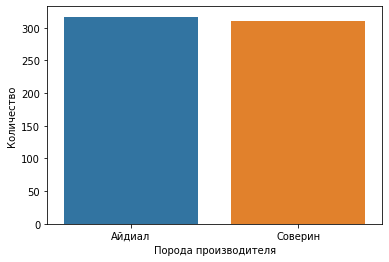

In [132]:
# рассмотрим породу производителя коров
sns.countplot(x='порода_папы_быка', data=df_main)
plt.xlabel('Порода производителя')
plt.ylabel('Количество')
plt.show()

Породы производителей коров в стаде фермера представлены практически в равном соотношении.

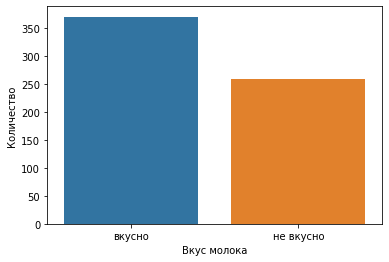

In [133]:
# рассмотрим характеристики вкуса молока
sns.countplot(x='вкус_молока', data=df_main)
plt.xlabel('Вкус молока')
plt.ylabel('Количество')
plt.show()

Очевидно, что в стаде фермера коровы дают преимущественно вкусное молоко. Вместе с тем, отмечается довольно много противоположных характеристик. Вероятно, это одна из причин желания фермера расширить поголовье стада коров.

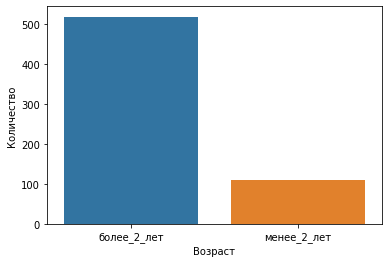

In [134]:
# рассмотрим возраст стада
sns.countplot(x='возраст', data=df_main)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

Большая часть стада представлена коровами, которым более двух лет.

**Рассмотрим количественные признаки таблицы с данными о стаде фермера.** 

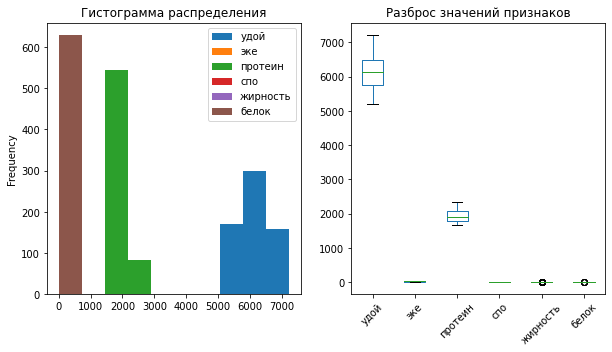

In [135]:
# список количественных признаков тренировочной выборки
num_col_main = ['удой',
                 'эке',
                 'протеин',
                 'спо',
                 'жирность',
                 'белок']

# построим гистограмму частотности распределения и ящик с усами
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_main[num_col_main].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_main[num_col_main].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

- Всего в датасете шесть количественных признаков.
- Все они разного масштаба.

Рассмотрим отдельно каждый признак, построим гистограмму частотности распределения и ящик с усами.

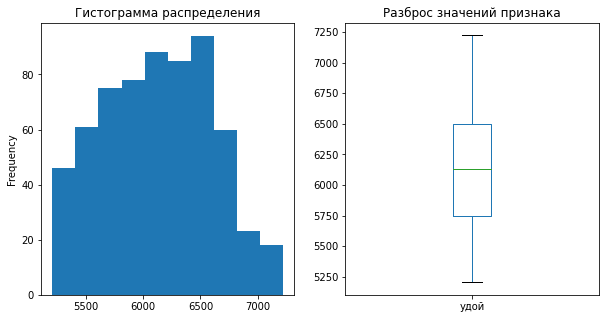

In [136]:
# рассмотрим значения по признаку 'удой'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_main['удой'].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_main['удой'].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений признака')
plt.show()

- Распределение значений напоминает положительную асимметрию: удой большинства коров в стаде фермера около среднего значения — чуть более 6000 килограммов молока в год, при этом есть коровы с гораздо более высоким удоем молока.
- Диапазон надоев молока колеблется в пределах от 5200 до 7200 кг.
- Выбросов, которые указывали бы на наличие коров с необычно высокими или низкими надоями молока по сравнению с остальным стадом, не обнаружено.

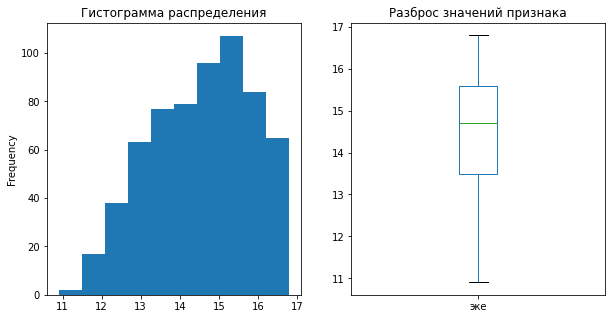

In [137]:
# рассмотрим значения по признаку 'эке'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_main['эке'].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_main['эке'].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений признака')
plt.show()

- Энергетическая кормовая единица *(показатель питательности корма)* в среднем соответствует значению около 15.
- Распределение `эке` имеет отрицательную асимметрию, поскольку среднее значения в большинстве случаев составляет около 15, а в некоторых — средний показатель питательности корма намного ниже.
- В целом `эке` может варьироваться в пределах от 11 до 17 эке.
- Выбросов, которые указывали бы на экстремально низкие или высокие значения, не обнаружено.

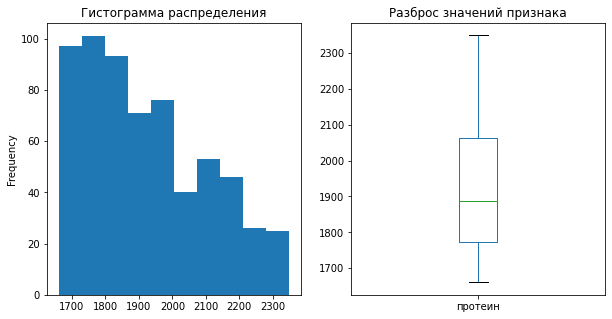

In [138]:
# рассмотрим значения по признаку 'протеин'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_main['протеин'].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_main['протеин'].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений признака')
plt.show()

- Распределение имеет положительную асимметрию.
- Содержание сырого протеина в корме в среднем составляет 1900 граммов. Медиана находится чуть ближе к низу, это означает, что чуть большая часть кормов имеет более низкое содержание протеина.
- Выбросов, которые указывали бы на экстремально низкие или высокие значения, не обнаружено.

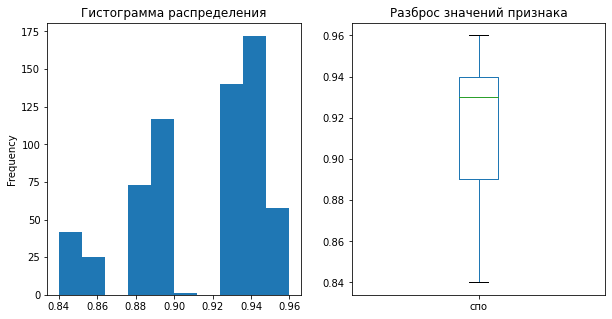

In [139]:
# рассмотрим значения по признаку 'спо'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_main['спо'].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_main['спо'].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений признака')
plt.show()

- Сахаро-протеиновое соотношение в корме в среднем представлено значением 0.93. Медиана находится ближе к верху поля, это означает, что большая часть кормов имеет более высокое значение отношения сахара к протеину.
- Выбросов, которые указывали бы на экстремально низкие или высокие значения, не обнаружено.

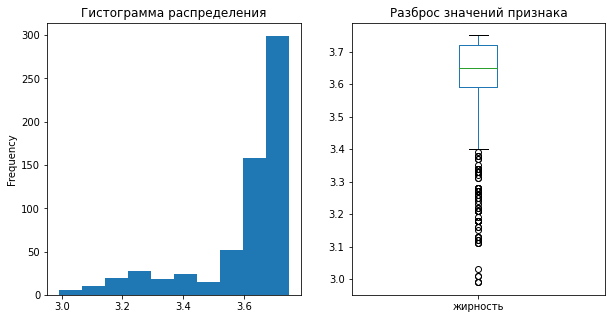

In [140]:
# рассмотрим значения по признаку 'жирность'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_main['жирность'].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_main['жирность'].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений признака')
plt.show()

- Гистограмма показыавет распределение с асимметрией влево, поскольку среднее значение жирности в большинстве образцов молока составляет около 3.65 %, а у некоторых среднее значение намного ниже.
- Форма ящика позволяет говорить, что большинство образцов молока имеют одинаковое содержание жира, в среднем около 3.65 %.
- Диапазон содержания жира в молоке колеблется в пределах от 3.4 % до 3.8 %. 
- Выбросы указывают, что есть образцы молока с исключительно низким содержанием жира по сравнению с большинством образцов.

Оценим как много данных потеряется, если отбросить крайне низкие значения признака *жирность*. Принимая во внимание высокие требования фермера к качеству молока, установим минимальную границу процентного содержания жирности не менее 3.3 %.

In [141]:
# вычисляем долю отброшенных аномалий
print("{:.2f}".format(len(df_main.query('жирность < 3.3')) / len(df_main) * 100))

9.87


Доля исключительно низких значений составляет менее 10 %. Вполне допустимо избавиться от таких выбросов, чтобы обеспечить корректность обучения модели.

Примем минимальную границу процентного содержания жирности фермерского молока 3.3 %.

In [142]:
# фильтруем датафрейм при помощи логической индексации
df_main = df_main[df_main['жирность'] >= 3.3]

In [143]:
# оценим данные после фильтрации
df_main['жирность'].describe()

count    566.000000
mean       3.649629
std        0.098773
min        3.310000
25%        3.610000
50%        3.710000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64

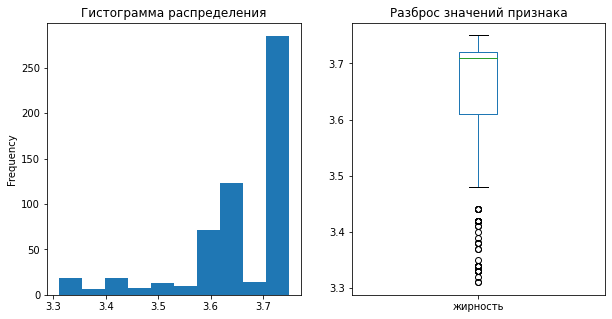

In [144]:
# повторно рассмотрим значения по признаку 'жирность'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_main['жирность'].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_main['жирность'].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений признака')
plt.show()

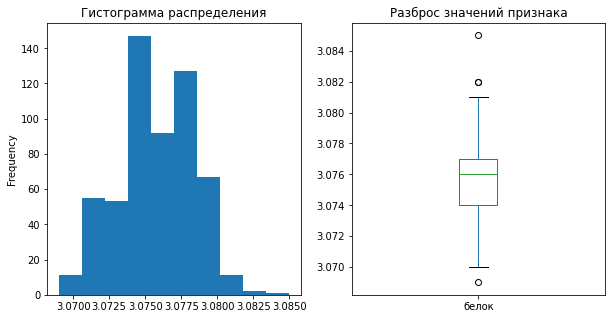

In [145]:
# рассмотрим значения по признаку 'белок'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_main['белок'].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_main['белок'].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений признака')
plt.show()

- В среднем содержание белка в молоке составляет примерно 3 %. При этом, значительная часть образцов молока имеет чуть более высокое содержание белка.
- Отдельные точки за пределами «усов» являются выбросами. Это могут быть образцы молока с необычно высоким или низким содержанием белка по сравнению с остальной частью набора данных.

**Проведём анализ категориальных признаков таблицы с данными о коровах «ЭкоФермы».**

In [146]:
# выведем число уникальных значений в каждом из категориальных столбцов
cat_col_buy = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст']
df_buy[cat_col_buy].nunique()

порода              2
тип_пастбища        2
порода_папы_быка    2
имя_папы            4
возраст             2
dtype: int64

В данных пять категориальных признаков, в каждом от двух до четырёх категории.

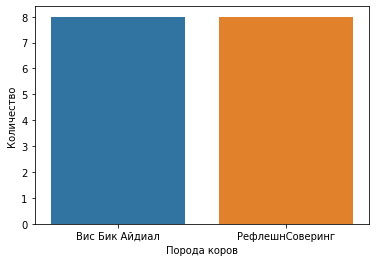

In [147]:
# построим гистограмму, чтобы визуализировать количество каждой породы
sns.countplot(x='порода', data=df_buy)
plt.xlabel('Порода коров')
plt.ylabel('Количество')
plt.show()

Коровы «ЭкоФермы» представлены породами *Викс Бик Айдиал* и *РефлешнСоверинг* в равном количестве.

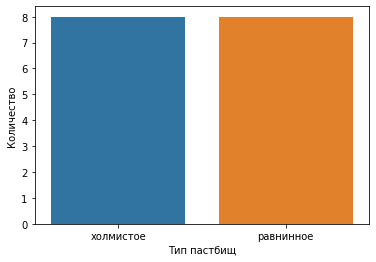

In [148]:
# построим гистограмму, чтобы показать распределение типов пастбищ
sns.countplot(x='тип_пастбища', data=df_buy)
plt.xlabel('Тип пастбищ')
plt.ylabel('Количество')
plt.show()

Пастбища в равном соотношении представлены холмистым и равнонным типами.

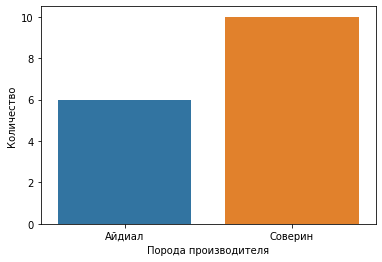

In [149]:
# рассмотрим породу производителя коров
sns.countplot(x='порода_папы_быка', data=df_buy)
plt.xlabel('Порода производителя')
plt.ylabel('Количество')
plt.show()

Среди производителей коров «ЭкоФермы» порода *Соверин* преобладает над *Айдиал*.

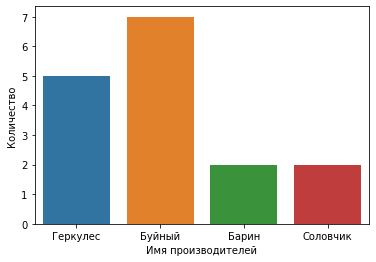

In [150]:
# рассмотрим имена производителей
sns.countplot(x='имя_папы', data=df_buy)
plt.xlabel('Имя производителей')
plt.ylabel('Количество')
plt.show()

Среди производителей коров «ЭкоФермы» очевидно доминирует *Буйный*.

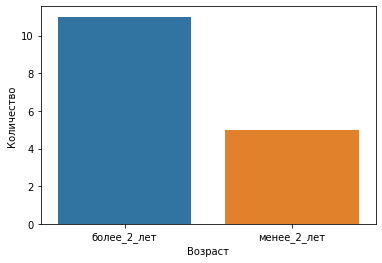

In [151]:
# рассмотрим возраст коров
sns.countplot(x='возраст', data=df_buy)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

Большей части представителей коров «ЭкоФермы» более двух лет.

**Рассмотрим количественные признаки таблицы с данными о коровах «ЭкоФермы».**

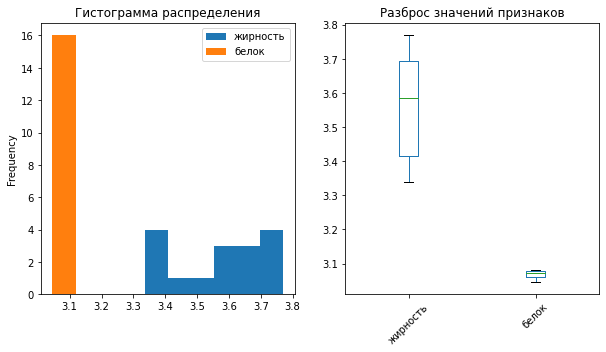

In [152]:
# список количественных признаков датасета «ЭкоФермы»
num_col_buy = ['жирность', 'белок']

# построим гистограмму частотности распределения и ящик с усами
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_buy[num_col_buy].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_buy[num_col_buy].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

В датасете два количественных признака разного масштаба.

Рассмотрим отдельно каждый признак, построим гистограмму частотности распределения и ящик с усами.

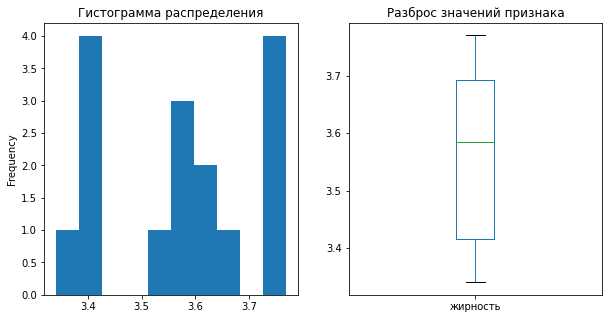

In [153]:
# рассмотрим значения по признаку 'жирность'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_buy['жирность'].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_buy['жирность'].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений признака')
plt.show()

- Форма ящика указывает на разброс в средних 50 % данных.
- Диапазон содержания жира в молоке колеблется в пределах от 3.3 % до 3.8 % и в среднем составляет около 3.6 %.

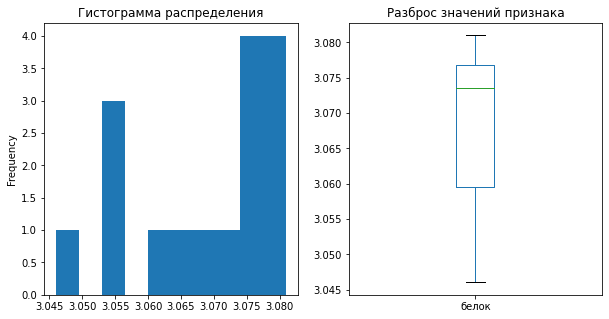

In [154]:
# рассмотрим значения по признаку 'белок'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_buy['белок'].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_buy['белок'].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений признака')
plt.show()

- Форма ящика показывает разброс в средних 50 % данных.
- В среднем содержание белка в молоке составляет примерно 3 %. При этом, значительная часть образцов молока имеет чуть более высокое содержание белка.

**Вывод:**

В данных наблюдается существенный разброс значений. Прежде чем использовать признаки для моделей их нужно подготовить:
- Масштабировать количественные признаки.
- Кодировать категориальные признаки.
- Повторно построить гистограмму частотного распределения и ящик с усами для количественных признаков, чтобы убедиться в правильности масштабирования.

### Шаг 4. Корреляционный анализ признаков в датасете фермера

**1. Изучим взаимосвязь между признаками: рассчитаем коэффициенты корреляции между всеми признаками.**

На предыдущем этапе было обнаружено, что не все признаки распределены нормально, поэтому для изучения взаимосвязи будем использовать корреляцию Phik, который устойчив к выбросам и ненормальному распределению.

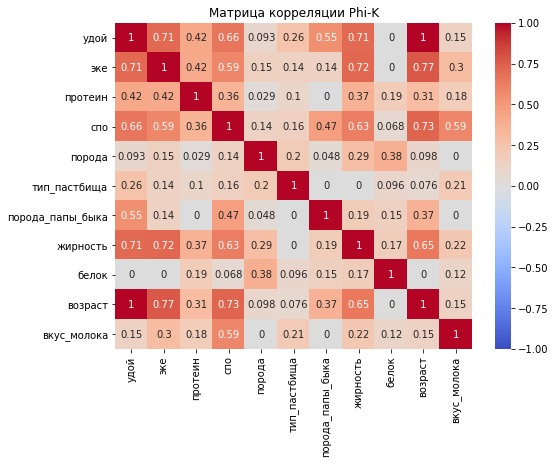

In [155]:
# для расчёта матрицы сохраним признаки в отдельную переменную, исключив id коровы
df_main_phik = df_main[[
    'удой',
    'эке',
    'протеин',
    'спо',
    'порода',
    'тип_пастбища',
    'порода_папы_быка',
    'жирность',
    'белок',
    'возраст',
    'вкус_молока'
]]

# укажем количественные признаки
num_cols = ['удой', 'эке', 'протеин', 'спо', 'жирность', 'белок']

# рассчитаем матрицу корреляции Phi-K между всеми признаками
phik_matrix = df_main_phik.phik_matrix(interval_cols=num_cols)

# построим heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляции Phi-K')
plt.show()

**Вывод:**
- Целевой признак *удой* коррелирует с входными *эке*, *жирность* и *спо*, коэффициенты корреляции указывают на довольно сильную положительную связь. 
- Менее сильная связь заметна между таргетом и признаками *протеин* и *порода_папы_быка*.
- Входной признаки *белок*, *порода* и *вкус_молока* почти не коррелируют с таргетом.
- Слабая линейная связь между целевыми и выходными признаками не подходит для линейной регрессии.
- Вызывает сомнения идеальная связь между *удоем* и *возрастом*. Это указывает на то, что целевой признак не меняется в пределах разных категорий входного признака. В контексте прогнозного моделирования целевой признак, который не варьируется в разных категориях входного признака, может не предоставлять много прогностической информации. Возможно его следует исключить.

**2. Построим диаграммы рассеяния для таргета *удой* и всех количественных признаков с учётом значения категориальных признаков.**

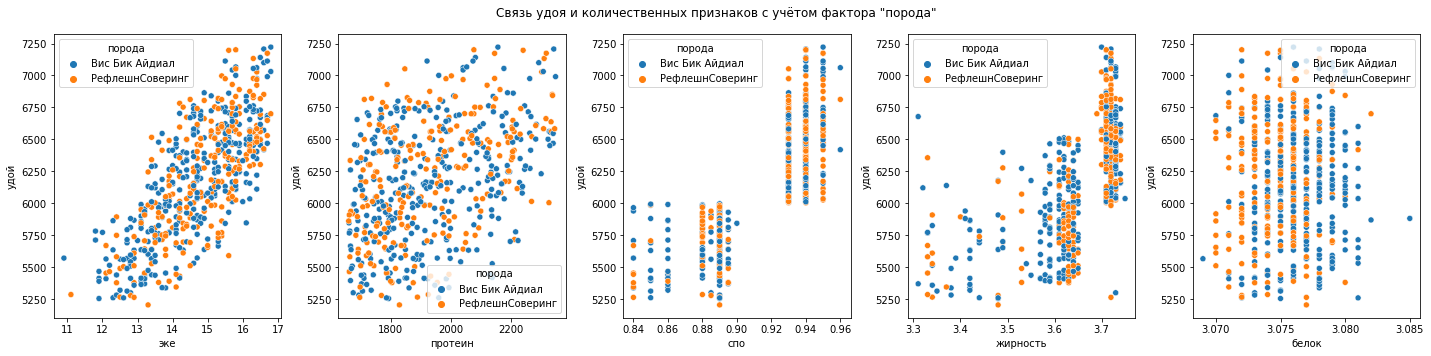

In [156]:
# строим диаграммы рассеяния для тагрета и всех количественных признаков
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

fig.suptitle('Связь удоя и количественных признаков с учётом фактора "порода"')

sns.scatterplot(x='эке', y='удой', hue='порода', data=df_main, ax=axes[0])
sns.scatterplot(x='протеин', y='удой', hue='порода', data=df_main, ax=axes[1])
sns.scatterplot(x='спо', y='удой', hue='порода', data=df_main, ax=axes[2])
sns.scatterplot(x='жирность', y='удой', hue='порода', data=df_main, ax=axes[3])
sns.scatterplot(x='белок', y='удой', hue='порода', data=df_main, ax=axes[4])

plt.tight_layout()
plt.show()

**Вывод:**
- Между признаками *удой* и *эке* (показатель питательности корма коровы) зависимость есть, но она не похожа на линейную.
- Между *удой* и *спо* (отношение сахара к протеину в корме коровы), связь нелинейная. Наблюдения сгруппированы в два кластера, при этом значение *спо* 0.9 можно считать границей между кластерами.
- Не наблюдается линейной зависимости между признаками *удой* и *протеин* и *удой* и *белок* в содержании молока.
- Между значениями *удой* и *жирность* молока, также не существует прямой, вдоль которой лежали бы точки. Это говорит об отсутствии линейной зависимости между целевым и входным признаками. Что вполне логично, довольно оригинальным было бы предсказывать *удой* коровы по признаку *жирность* молока.
- Мультиколлинеарность относится к ситуации, в которой две или более независимые переменные сильно коррелируют, что затрудняет различение индивидуального воздействия каждой переменной на зависимую переменную. В нашем случае сильная корреляция наблюдается между таргетом *удой* и входными признаками *эке* и *спо*, но это не означает автоматически мультиколлинеарность, ведь согласно диаграмме рассеяния между *удой* и *спо* связь нелинейная.

### Шаг 5. Обучение модели линейной регрессии

На данном этапе предстоит обучить три модели простой линейной регрессии, лучшая из трёх будет прогнозировать возможный удой коровы.

**1. Подготовим данные датасета с информацией о стаде фермера для обучени первой модели.**

Целевой признак — `удой`.

Количественные входные признаки:
- `эке` (показатель питательности корма) — коровы, получающие больше энергии из своего рациона, могут производить больше молока.
- `протеин` и `спо` (отношение сахара к протеину в корме) — баланс сахара и белка в корме может влиять на питательный состав и, таким образом, влиять на надои молока.

Категориальные входные признаки:
- `порода` — разным породам могут быть присущи различия в способности производить молоко.
- `порода папы быка` — подобно породе коровы, порода производителя может способствовать генетическим факторам, влияющим на удой.
- `тип пастбища` — может влиять на качество и количество потребляемого корма, влияя на здоровье коров и продуктивность молока.
- `возраст` — может иметь значение, поскольку коровы более молодого и старшего возраста могут иметь разные возможности производства молока.

Исключённые признаки:
- `жирность` и `белок` в молоке коровы — хотя эти компоненты могут зависеть от породы, отражать полноценность питания коровы и коррелировать с удоем, они не связаны с таргетом причинно-следственными отношениями. Исключим эти признаки, чтобы не вносить шум и не стимулировать модель находить ложные зависимости.

In [158]:
# вывод размерности датафрейма
df_main.shape

(566, 12)

In [159]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

# выделяем в отдельные переменные целевой признак и входные признаки
X = df_main.drop('удой', axis=1)
y = df_main['удой']

# разделяем данные на тренировочные и тестовые, фиксируем random_state
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

# список качественных и количественных признаков тренировочной выборки
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_names = ['эке', 'протеин', 'спо']

# подготовка признаков для масштабирования и кодирования

# переменная с экземпляром класса StandartScaler()
scaler = StandardScaler()

# обучение и преобразование количественных признаков из тренировочной выборки
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# переменная с экземпляром класса OneHotEncoder()
# включим параметр для избегания появления дамми-ошибок, отключим sparse-отображение
encoder = OneHotEncoder(drop='first', sparse=False)

# обучение и преобразование категориальных признаков из тренировочной выборки
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получение от кодировщика списка новых столбцов и сохранение в новой переменной
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# получим пять первых строк из тренировочного датафрейма
X_train.head()

,x0_РефлешнСоверинг,x1_холмистое,x2_Соверин,x3_менее_2_лет,эке,протеин,спо
0,0.0,1.0,1.0,0.0,-0.259680,1.011085,0.764866
1,1.0,1.0,1.0,0.0,0.716134,1.427012,1.097826
2,0.0,1.0,1.0,0.0,1.204041,1.870302,0.764866
3,1.0,0.0,0.0,0.0,0.797452,0.430977,0.764866
4,0.0,0.0,0.0,0.0,0.390863,0.162813,0.764866


Построим гистограмму частотного распределения и ящик с усами для количественных признаков, чтобы убедиться в корректности масштабирования.

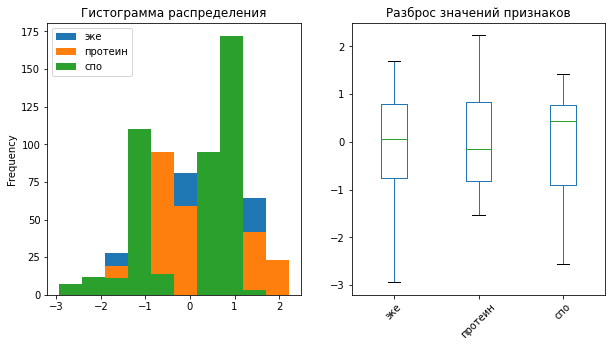

In [160]:
# построим гистограмму частотности распределения и ящик с усами
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

**Вывод:**
- В целом данные корректно отмасштабированы.
- Большая часть значений находятся в пределах от -2.8 до 2.5.
- Есть выбросы, в частности, высокие значения сахаро-протеинового соотношения в корме.

Обучим модель линейной регрессии и оценим её качество, вычислив коэффициент детерминации R², который позволяет сравнивать модели с разными масштабами целевого признака.

In [161]:
# обучение модели и получение предсказаний на тестовых данных
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_1 = model_lr.predict(X_test)

# рассчитаем значения R2 для первой модели
r2_1 = r2_score(y_test, predictions_1)

# получим значение R2
print("R2 LinearRegression =", r2_1)

R2 LinearRegression = 0.7590883613475259


**Вывод:**

Значение коэффициента детерминации равен 0.7590, что составляет примерно 76 %. Это говорит о том, что модель линейной регрессии объясняет около 76 % отклонений зависимой переменной (удой), основанной на независимых переменных, включенных в модель. Иными словами, модель показывает хорошую обобщающую способность и высокое качество предсказания в 76 процентах случаев.

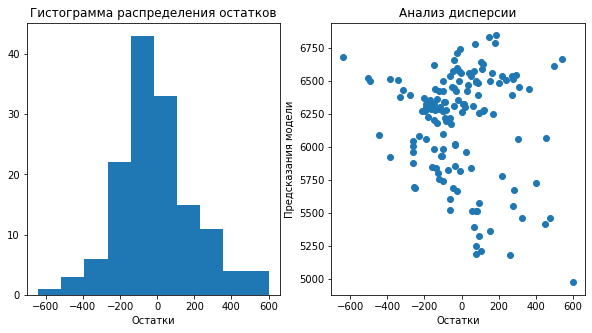

In [163]:
# проведём анализ остатков
residuals_1 = y_test - predictions_1

# построим графики
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_1)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(residuals_1, predictions_1)
axes[1].set_xlabel('Остатки')
axes[1].set_ylabel('Предсказания модели')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Вывод:**

- Гистограмма распределения остатков показывает равномерное распределение. Это говорит о том, что у модели стабильная ошибка на всех предсказаниях. При этом есть явный пик, это означает, что не все остатки стремятся к нулевому значению и точность предсказания модели пока не оптимальна.
- Анализ дисперсии выявил увеличение разброса ошибки по мере увеличения прогнозируемых значений. То есть, дисперсия остатков не является постоянной на всех уровнях прогнозируемых значений. Это может указывать на то, что производительность модели варьируется в разных диапазонах целевого признака. 
- Анализ остатков показывает, что модель есть куда улучшать. Для этого попробуем включить дополнительные признаки, с учётом связи входных признаков с целевым.

**2. Подготовим данные с учётом связи входных признаков с целевым и обучим на них вторую модель.**

Диаграммы рассеяния показали, что некоторые входные признаки связаны с целевым нелинейно. В частности, `удой` и `спо` связаны нелинейно. Наблюдения сгруппированы в два кластера, при этом значение `спо` 0.9 можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем `спо` в категориальный бинарный признак, использовав эту границу.

**Исключим нелинейность**, чтобы входные признаки стали информативны для линейной регрессии. Для этого:
- Преобразуем `спо` в категориальный бинарный признак, на основе заданной границы 0.9.
- Нелинейность между `удой` и `эке` попробуем устранить, введением нового признака `эке` в квадрате.
- Исключим признаки `протеин`, `жирность` и `белок`, так как между ними и целевым признаком `удой` не наблюдается линейной зависимости согласно диаграммам рассеяния. Кроме того, `жирность` и `белок` характеризуют преимущественно вкус молока, но не удой.

In [164]:
# создадим новый столбец 'новый_спо' на основе заданной границы
df_main['новый_спо'] = (df_main['спо'] >= 0.9).astype(int)
# выведем пять случайных значений нового столбца
df_main['новый_спо'].sample(5)

46     1
327    1
298    1
142    1
141    1
Name: новый_спо, dtype: int32

In [165]:
# введём квадратичный термин для 'эке'
df_main['новый_эке'] = df_main['эке'] ** 2
# выведем пять случайных значений нового столбца
df_main['новый_эке'].sample(5)

582    193.21
466    225.00
291    216.09
240    179.56
32     246.49
Name: новый_эке, dtype: float64

In [166]:
RANDOM_STATE = 42

X = df_main.drop('удой', axis=1)
y = df_main['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

# обновленный список качественных и количественных признаков тренировочной выборки
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'новый_спо']
num_col_names = ['эке', 'новый_эке']

# подготовка признаков для масштабирования и кодирования
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# обучение модели и получение предсказаний на тестовых данных
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_2 = model_lr.predict(X_test)

# рассчитаем значения R2 для линейной регрессии
r2_2 = r2_score(y_test, predictions_2)

# получим значение R2
print("R2 LinearRegression =", r2_2)

R2 LinearRegression = 0.7674799131059332


**Вывод:**

Вторая модель немного улучшила показатели по сравнению с первой — с 0.7590 до 0.7674.

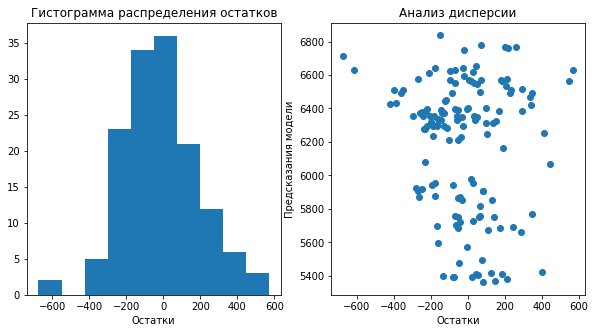

In [167]:
# проведём анализ остатков
residuals_2 = y_test - predictions_2

# построим графики
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(residuals_2, predictions_2)
axes[1].set_xlabel('Остатки')
axes[1].set_ylabel('Предсказания модели')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Вывод:**

- Дисперсия остатков по-прежнему не является постоянной на всех уровнях прогнозируемых значений. Производительность модели варьируется в разных диапазонах целевого признака. 
- Модель явно нуждается в дополнительной информации.

**3. Добавим в данные новый признак и обучим на них третью модель.**

Расширим датасет, добавив информацию о производителе каждой коровы в стаде фермера, в частности, новый признак `имя_папы`.

In [168]:
# добавим новый признак 'имя_папы'
df_main = df_main.merge(df_dad, on='id', how='left')
df_main.head()

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,новый_спо,новый_эке,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


In [169]:
RANDOM_STATE = 42

X = df_main.drop('удой', axis=1)
y = df_main['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

# обновленный список качественных и количественных признаков тренировочной выборки
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'новый_спо', 'имя_папы']
num_col_names = ['эке', 'новый_эке']

# подготовка признаков для масштабирования и кодирования
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# обучение модели и получение предсказаний на тестовых данных
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_3 = model_lr.predict(X_test)

# рассчитаем значения R2 для линейной регрессии
r2_3 = r2_score(y_test, predictions_3)

# получим значение R2
print("R2 LinearRegression =", r2_3)

R2 LinearRegression = 0.7800457251783802


**Вывод:**

Результат расчёта коэффициента детерминации свидетельствует, что модель линейной регрессии объясняет около 78 % отклонений зависимой переменной (удой), основанной на независимых переменных, включенных в модель. Иными словами, третья модель показывает хорошую обобщающую способность и высокое качество предсказания в 78 процентах случаев, что чуть выше результов первой и второй моделей. 

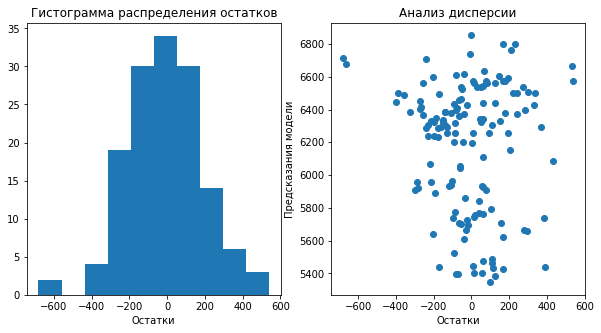

In [170]:
# проведём анализ остатков
residuals_3 = y_test - predictions_3

# построим графики
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_3)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(residuals_3, predictions_3)
axes[1].set_xlabel('Остатки')
axes[1].set_ylabel('Предсказания модели')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Вывод:**

Устранение нелинейности и включение в датасет дополнительных признаков позволило немного повысить прогнозные способности третьей модели. Однако, результаты не позволяют говорить о ярко выраженных изменениях в улучшении производительности модели.

**3. Сравним качество трёх моделей линейной регрессии, сопоставим их R² и остатки.**

In [171]:
# коэффициенты детерминации для каждой модели
print(f'R² первой модели: {r2_1}')
print(f'R² второй модели: {r2_2}')
print(f'R² третьей модели: {r2_3}')

R² первой модели: 0.7590883613475259
R² второй модели: 0.7674799131059332
R² третьей модели: 0.7800457251783802


**Вывод:**

Третья модель показывает чуть более высокие значения коэффициента детерминации по сравнению с первой и второй, это предполагает, что она объясняет большую дисперсию целевой переменной. Иными словами, обобщающая способность и прогнозная точность третьей модели немного лучше по сравнению с другими: 78 % предсказаний модели ближе к истине, чем среднее значение целевого признака.

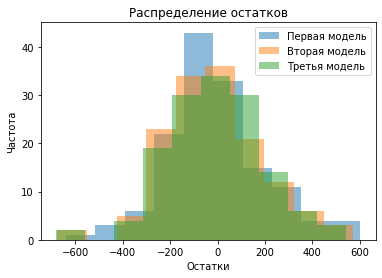

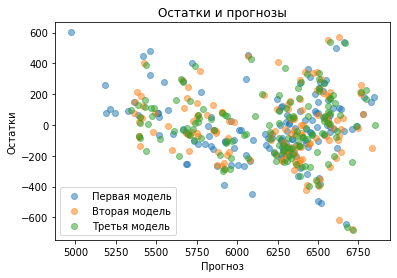

In [172]:
# гистограммы остатков для каждой модели
plt.hist(residuals_1, label='Первая модель', alpha=0.5)
plt.hist(residuals_2, label='Вторая модель', alpha=0.5)
plt.hist(residuals_3, label='Третья модель', alpha=0.5)
plt.legend()
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

# диаграммы рассеяния для каждой модели
plt.scatter(predictions_1, residuals_1, label='Первая модель', alpha=0.5)
plt.scatter(predictions_2, residuals_2, label='Вторая модель', alpha=0.5)
plt.scatter(predictions_3, residuals_3, label='Третья модель', alpha=0.5)
plt.legend()
plt.title('Остатки и прогнозы')
plt.xlabel('Прогноз')
plt.ylabel('Остатки')
plt.show()

**Вывод:**
- Устранение нелинейности и включение в датасет дополнительных признаков позволило немного повысить прогнозные способности третьей модели. 
- Более плотное распределение позволяет говорить, что модель научилась чуть лучше предсказывать значения для коров, чей удой высокий.
- Вместе с тем, общие прогнозные способности модели потенциально есть куда улучшать.

**5. Оценим качество каждой модели по трём метрикам: MSE, RMSE, MAE.**

In [173]:
# рассчитаем MSE для каждой модели
mse_1 = mean_squared_error(y_test, predictions_1)
mse_2 = mean_squared_error(y_test, predictions_2)
mse_3 = mean_squared_error(y_test, predictions_3)

print(f'MSE первой модели: {mse_1:.0f}')
print(f'MSE второй модели: {mse_2:.0f}')
print(f'MSE третьей модели: {mse_3:.0f}')

MSE первой модели: 44345
MSE второй модели: 42800
MSE третьей модели: 40487


**Вывод:**

Результат вычисления средней квадратичной ошибки показывает, что в среднем предсказание третьей модели отличается от истинного значения на значение приблизительно равное *40487* квадратных единиц килограммов молока, которые корова даёт в год. Это наименьший показатель по сравнению с другими.

In [174]:
# рассчитаем RMSE для каждой модели
rmse_1 = np.sqrt(mse_1)
rmse_2 = np.sqrt(mse_2)
rmse_3 = np.sqrt(mse_3)

print(f'RMSE первой модели: {rmse_1:.0f}')
print(f'RMSE второй модели: {rmse_2:.0f}')
print(f'RMSE третьей модели: {rmse_3:.0f}')

RMSE первой модели: 211
RMSE второй модели: 207
RMSE третьей модели: 201


**Вывод:**

Результат вычисления квадратного корня из средней квадратичной ошибки показывает, что в среднем предсказание третьей модели отличается от истинного значения на *201* килограммов молока, которые корова даёт в год. Это наименьший показатель по сравнению с другими. Отметим, что данная метрика подвержена влиянию выбросов.

In [175]:
# рассчитаем MAE для каждой модели
mae_1 = mean_absolute_error(y_test, predictions_1)
mae_2 = mean_absolute_error(y_test, predictions_2)
mae_3 = mean_absolute_error(y_test, predictions_3)

print(f'MAE первой модели: {mae_1:.0f}')
print(f'MAE второй модели: {mae_2:.0f}')
print(f'MAE третьей модели: {mae_3:.0f}')

MAE первой модели: 162
MAE второй модели: 162
MAE третьей модели: 156


**Вывод:**

Значение MAE говорит о том, что третья модель в среднем ошибается на 156 килограммов при прогнозировании массы молока, которую корова даёт в год. Это наименьший показатель по сравнению с другими. Отметим, что метрика устойчива к выбросам в данных.

Основываясь на результатах оценки качества моделей с использованием различных метрик, целесообразность применения которых определяется спецификой бизнес-задач, выберем третью модель как наиболее оптимальную для прогноза удоя коров.

**Оценим доверительный интервал прогноза лучшей модели**, чтобы представить диапазон, который, вероятно, содержит истинное значение. Наличие доверительных интервалов может помочь понять диапазон вероятных результатов для модели и потенциальную изменчивость оценок.

In [176]:
# расчёт доверительного интервала
print('95% доверительный интервал =', st.norm.interval(0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))

95% доверительный интервал = (6112.557671390747, 6242.9938666799135)


**Вывод:**

На основе модели и данных мы на 95 % уверены, что истинное среднее значение прогнозов массы молока, которую корова даёт в год находится в пределах от 6112 до 6242 килограммов.

**6. С помощью лучшей модели спрогнозируем удой коров, которых фермер планирует купить.**

В датасете с информацией о коровах «ЭкоФермы» имеются не все признаки, восполним их средними значениями признаков из датасета фермера. Таким образом мы сформируем таблицу с совпадающим набором полей для прогноза.

In [177]:
# добавим в датасет для прогноза недостающие признаки
average_values = df_main[['эке', 'спо', 'протеин', 'новый_эке']].mean()
# средние значения каждого из признаков увеличим на 5 %
increased_values = average_values * 1.05
# добавим недостающие столбцы в df_buy
df_buy['эке'] = increased_values['эке']
df_buy['спо'] = increased_values['спо']
df_buy['протеин'] = increased_values['протеин']
df_buy['новый_эке'] = increased_values['новый_эке']
# создадим новый столбец 'новый_спо' на основе заданной границы
df_buy['новый_спо'] = (df_buy['спо'] >= 0.9).astype(int)
df_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке,спо,протеин,новый_эке,новый_спо
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.440751,0.962911,2033.696025,228.641303,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.440751,0.962911,2033.696025,228.641303,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.440751,0.962911,2033.696025,228.641303,1
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.440751,0.962911,2033.696025,228.641303,1
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.440751,0.962911,2033.696025,228.641303,1


In [178]:
RANDOM_STATE = 42

X = df_main.drop('удой', axis=1)
y = df_main['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

# обновленный список качественных и количественных признаков тренировочной выборки
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'новый_спо', 'имя_папы']
num_col_names = ['эке', 'новый_эке']

# подготовка признаков для масштабирования и кодирования
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# обучение модели и получение предсказаний на тестовых данных
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

# датасет для прогноза
X_buy_cow = df_buy

# подготовка признаков нового датасета для масштабирования и кодирования
X_buy_cow_scaled = scaler.transform(X_buy_cow[num_col_names])
X_buy_cow_ohe = encoder.transform(X_buy_cow[cat_col_names])

X_buy_cow_processed = pd.concat([
    pd.DataFrame(X_buy_cow_ohe, columns=encoder_col_names),
    pd.DataFrame(X_buy_cow_scaled, columns=num_col_names)
], axis=1)

# получение предсказаний
pred_buy_cow = model_lr.predict(X_buy_cow_processed)
pred_buy_cow

array([6323.34044926, 5967.7191545 , 5988.76007238, 6302.07592893,
       6251.65652167, 6058.20458246, 6230.63549697, 6039.15958646,
       6053.64803701, 6321.12092493, 6323.34044926, 5741.65268335,
       6302.07592893, 6053.64803701, 6058.20458246, 6230.63549697])

**Вывод:**
- По результатам прогноза модели бо́льшая часть значений попадает в интервал от 6112 до 6242 килограммов *(95 % доверительный интервал)*.
- По всей видимости прогнозные способности модели позволяют отобрать коров по одному из критериев: средний удой за год — не менее 6000 килограммов.

### Шаг 6. Обучение модели логистической регрессии (задача классификации)

На данном этапе предстоит обучить модель логистической регрессии, которая будет рассчитывать вероятность получить вкусное молоко от коровы.

**1. Подготовим данные датасета с информацией о стаде фермера для обучени модели.**

Целевой признак — `вкус молока`.

Количественные входные признаки:
- `эке`, `протеин` и `спо` — компоненты, которые относятся к рациону коровы, их содержание в корме может влиять на питательный состав и, таким образом, влиять на вкус молока.
- `жирность` и `белок` в молоке коровы — непосредственно характеризуют вкус молока.

Категориальные входные признаки:
- `порода` и `порода папы быка` — разным породам могут быть присущи различия в составе и балансе питательных веществ производимого молока, что отражается и на вкусовых характеристиках.
- `тип пастбища` — может влиять на качество и количество потребляемого коровой корма, обуславливая состав и вкус молока.
- `возраст` — может иметь значение, поскольку молоко коров более молодого и старшего возраста может иметь различные вкусовые характеристики.

Учитывая специфику задач бинарной классификации, создадим в датафрейме новый столбец `вкус` в качестве двоичного индикатора, где 1 значит *«вкусно»*, а 0 это *«не вкусно»*.

Такое кодирование полезно при обучении модели логистической регрессии, поскольку оно позволяет алгоритму изучить взаимосвязь между признаками и переменной двоичного результата (в данном случае вкусом молока).

In [179]:
# создадим новый двоичный столбец со значениями целевой переменной
df_main['вкус'] = df_main['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
df_main.head()

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,новый_спо,новый_эке,имя_папы,вкус
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный,1
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик,1
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин,0
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный,0
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин,1


In [180]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

# разбиваем признаки на входные и целевой
X = df_main[[
    'эке',
    'протеин',
    'спо',
    'порода',
    'тип_пастбища',
    'порода_папы_быка',
    'жирность',
    'белок',
    'возраст',
    'новый_спо',
    'новый_эке',
    'имя_папы'
]]
y = df_main['вкус']

# разбиваем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

# список качественных и количественных признаков тренировочной выборки
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'новый_спо', 'имя_папы']
num_col_names = ['эке', 'новый_эке', 'спо', 'протеин', 'жирность', 'белок']

# подготовка признаков для масштабирования и кодирования
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# обучение модели и получение предсказаний на тестовых данных
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# рассмотрим как веса коэффициентов модели влияют на предсказания
for feature_number, feature_name in enumerate(X.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")

эке                 : +0.78
протеин             : +1.86
спо                 : +0.91
порода              : +1.54
тип_пастбища        : +0.06
порода_папы_быка    : +0.86
жирность            : +0.68
белок               : +0.64
возраст             : +1.00
новый_спо           : +1.57
новый_эке           : +3.63
имя_папы            : +1.04


**Вывод:**
- Согласно полученным коэффициентам, показатель питательности корма коровы наиболее значим.
- Его вклад в оценку вкуса молока примерно в 3.6 раз выше, чем у остальных признаков.
- Остальные признаки стоит воспринимать как уточняющие, но не определяющие.

In [181]:
# теперь оценим качество на тестовой выборке
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('Accuracy: ',round(acc, 3))
print('Recall: ',round(recall, 3))
print('Precision: ',round(precision, 3))

Accuracy:  0.697
Recall:  0.837
Precision:  0.713


**Вывод:**

- Общая точность прогнозов модели — 69.7 % прогнозов оказались верными. Вместе с тем, модель пока ошибается довольно часто примерно в 30 % случаев.
- Способность модели идентифицировать все соответствующие экземпляры класса —  модель выявила 83.7 % «вкусных» образцов.
- Точность положительных прогнозов, сделанных моделью — 71.3 % образцов, предсказанных как «вкусные», на самом деле были «вкусными».

In [182]:
# построим матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[27, 29],
       [14, 72]], dtype=int64)

**Вывод:**

Матрица ошибок показала следующие результаты:
- Истинно отрицательный (TN): 27 экземпляров были правильно предсказаны как «невкусные».
- Ложноположительный (FP): 29 экземпляров были ошибочно предсказаны как «вкусные», хотя на самом деле они были «невкусными».
- Ложноотрицательный (FN): 14 экземпляров были ошибочно оценены как «невкусные», хотя на самом деле они были «вкусными».
- Истинно положительный (TP): 72 экземпляра были правильно оценены как «вкусные».

Основным приоритетом фермера является выбор коров, способных производить вкусное молоко, значит минимизация ложноположительных результатов (максимальное увеличение precision) будет иметь решающее значение.

Ложноположительные прогнозы приводят к отбору коров, не обладающих желаемым признаком. Цель состоит в том, чтобы свести к минимуму вероятность выбора коров, которые не соответствуют критериям производства вкусного молока, значит следует максимизировать значения precision.

Сейчас модель допускает ошибку первого рода в 29 случаях. Для минимизации критической ошибки, **настроим порог** принадлежности к классам.

In [183]:
# выведем объекты по убыванию вероятности их принадлежности к классу 1
y_proba = clf.predict_proba(X_test)[:,1]

df_thresholds = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_true', 'y_proba']).sort_values(by='y_proba',ascending=False)

df_thresholds.head() 

,y_true,y_proba
138,1,0.900854
37,1,0.893521
15,1,0.863163
120,1,0.860141
12,1,0.849646


In [184]:
# рассмотрим работу модели при разных порогах
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 5,endpoint=False)]
# список для новых столбцов
columns = []
# добавим столбцы с новыми прогнозами в df_thresholds
for i in thresholds:
    columns.append('y_pred_'+str(i))
    df_thresholds['y_pred_'+str(i)] = df_thresholds['y_proba'].apply(lambda x, threshold=i: 1 if x >= threshold else 0)
# выведем 5 случайных строк
df_thresholds.sample(5)

,y_true,y_proba,y_pred_0.1,y_pred_0.28,y_pred_0.46,y_pred_0.64,y_pred_0.82
80,1,0.603683,1,1,1,0,0
135,1,0.617946,1,1,1,0,0
92,1,0.739183,1,1,1,1,0
26,0,0.320181,1,1,0,0,0
79,1,0.629984,1,1,1,0,0


In [185]:
# рассмотрим подходящие пороговые значения
y_true = df_thresholds['y_true']

# списки для результатов
thresholds_list = []
precision_list = []
tp_list = []
fp_list = []
tn_list = []
fn_list = []

for i in thresholds:
    y_pred = df_thresholds['y_pred_' + str(i)]
    
    # расчёт precision
    precision = precision_score(y_true, y_pred)
    # расчёт confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # добавим результаты
    thresholds_list.append(i)
    precision_list.append(precision)
    tp_list.append(tp)
    fp_list.append(fp)
    tn_list.append(tn)
    fn_list.append(fn)

# создадим df_res с результатами
df_res = pd.DataFrame({
    'Threshold': thresholds_list,
    'Precision': precision_list,
    'TP': tp_list,
    'FP': fp_list,
    'TN': tn_list,
    'FN': fn_list
})

df_res

,Threshold,Precision,TP,FP,TN,FN
0,0.10,0.614286,86,54,2,0
1,0.28,0.628788,83,49,7,3
2,0.46,0.691589,74,33,23,12
3,0.64,0.844828,49,9,47,37
4,0.82,0.900000,9,1,55,77


**Вывод:**

Задача бизнеса состоит в том, чтобы свести к минимуму вероятность выбора коров, которые не соответствуют критериям производства вкусного молока, значит следует максимизировать значения precision. На этих основаниях, оптимальным значением порога будет 0.82.
Сейчас модель допускает ошибку первого рода (FP) в 29 случаях, то есть 29 образцов были ошибочно предсказаны как «вкусные», хотя на самом деле они были «невкусными». Пороговое значение 0.82 позволил свести такие ошибочные прогнозы модели к минимуму.

In [186]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

# разбиваем признаки на входные и целевой
X = df_main[[
    'эке',
    'протеин',
    'спо',
    'порода',
    'тип_пастбища',
    'порода_папы_быка',
    'жирность',
    'белок',
    'возраст',
    'новый_спо',
    'новый_эке',
    'имя_папы'
]]
y = df_main['вкус']

# разбиваем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

# список качественных и количественных признаков тренировочной выборки
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'новый_спо', 'имя_папы']
num_col_names = ['эке', 'новый_эке', 'спо', 'протеин', 'жирность', 'белок']

# подготовка признаков для масштабирования и кодирования
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# обучение модели и получение предсказаний на тестовых данных
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

# установим погрог
custom_threshold = 0.82

# получение прогноза с учётом порога
probabilities_test = clf.predict_proba(X_test)[:, 1]
pred_test_custom = (probabilities_test > custom_threshold).astype(int)

# оценим качество модели с учётом порога
acc_custom = accuracy_score(y_test, pred_test_custom)
recall_custom = recall_score(y_test, pred_test_custom)
precision_custom = precision_score(y_test, pred_test_custom)
conf_matrix_custom = confusion_matrix(y_test, pred_test_custom)

print(f'Accuracy с учётом порога :',round(acc_custom, 3))
print(f'Recall с учётом порога :',round(recall_custom, 3))
print(f'Precision с учётом порога :',round(precision_custom, 3))
print('\nМатрица ошибок с учётом порога:')
print(conf_matrix_custom)

Accuracy с учётом порога : 0.451
Recall с учётом порога : 0.105
Precision с учётом порога : 0.9

Матрица ошибок с учётом порога:
[[55  1]
 [77  9]]


**Вывод:**

Матрица ошибок показывает, что модель с этим конкретным порогом имеет высокую точность, но низкую полноту оценки. Это означает, что когда модель предсказывает «вкусно», она часто оказывается верной (высокое precision), но пропускает значительное количество реальных «вкусных» экземпляров (низкое recall).

In [187]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

# разбиваем признаки на входные и целевой
X = df_main[[
    'эке',
    'протеин',
    'спо',
    'порода',
    'тип_пастбища',
    'порода_папы_быка',
    'жирность',
    'белок',
    'возраст',
    'новый_спо',
    'новый_эке',
    'имя_папы'
]]
y = df_main['вкус']

# разбиваем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

# список качественных и количественных признаков тренировочной выборки
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'новый_спо', 'имя_папы']
num_col_names = ['эке', 'новый_эке', 'спо', 'протеин', 'жирность', 'белок']

# подготовка признаков для масштабирования и кодирования
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# обучение модели и получение предсказаний на тестовых данных
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

# установим погрог
custom_threshold = 0.82

# получение прогноза с учётом порога
probabilities_test = clf.predict_proba(X_test)[:, 1]
pred_test_custom = (probabilities_test > custom_threshold).astype(int)

# датасет для прогноза
X_buy_taste = df_buy[[
    'эке',
    'протеин',
    'спо',
    'порода',
    'тип_пастбища',
    'порода_папы_быка',
    'жирность',
    'белок',
    'возраст',
    'новый_спо',
    'новый_эке',
    'имя_папы'
]]

# подготовка признаков нового датасета для масштабирования и кодирования
X_buy_taste_scaled = scaler.transform(X_buy_taste[num_col_names])
X_buy_taste_ohe = encoder.transform(X_buy_taste[cat_col_names])

X_buy_taste_processed = pd.concat([
    pd.DataFrame(X_buy_taste_ohe, columns=encoder_col_names),
    pd.DataFrame(X_buy_taste_scaled, columns=num_col_names)
], axis=1)

# получение предсказаний
probabilities_buy_taste = clf.predict_proba(X_buy_taste_processed)[:, 1]
pred_buy_taste_custom = (probabilities_buy_taste > custom_threshold).astype(int)

# вывод результата
pred_buy_taste_custom

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

**Вывод:**

- С учётом установленного порога модель имеет точность (precision) 90 %. Это означает, что 90 % образцов, предсказанных как «вкусные», действительно были «вкусными». 
- В датасете с информацией о коровах «ЭкоФермы» модель предсказала пять образцовых коров, которые соответствуют строгим критериям фермера.

In [188]:
# добавим прогнозы вкуса и удоя молока коров «ЭкоФермы» в df_buy
df_buy['вкус'] = pred_buy_taste_custom
df_buy['удой'] = pred_buy_cow

In [189]:
# отбор коров с удоем более 6000 кг в год и вкусным молоком
selected_cows = df_buy[(df_buy['удой'] >= 6000) & (df_buy['вкус'] == 1)]
selected_cows

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке,спо,протеин,новый_эке,новый_спо,вкус,удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.440751,0.962911,2033.696025,228.641303,1,1,6323.340449
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.440751,0.962911,2033.696025,228.641303,1,1,6039.159586
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.440751,0.962911,2033.696025,228.641303,1,1,6053.648037


### Шаг 7. Итоговые выводы

На данных фермерского хозяйства был проведён исследовательский анализ с последующей разработкой двух прогнозных моделей, которые помогут фермеру управлять рисками при принятии решений для развития бизнеса.

Учитывая бизнес-задачи заказчика, разработаны две прогнозные модели для отбора молочного скота в поголовье:

1. Первая — предсказывает возможный `удой` коровы.
2. Вторая — рассчитывает вероятность получить `вкусное` молоко от коровы.

Работа включала предварительный этап, исследовательский анализ данных и собственно разработку моделей.

На **предварительном этапе** мы изучили основные сведения о трёх датасетах с последующей предобработкой, в частности: определили количество и тип данных в таблицах, привели названия столбцов к единому стилю, проверили данные на наличие дубликатов и пропущенных значений по каждому столбцу, преобразовали тип значений в некоторых столбцах и убедились, что все данные отображаются корректно.

На этапе **исследовательского анализа** был проведён статистический анализ всех признаков, построены графики и оценены особенности распределения количественных признаков.

Этап **разработки модели** включал подготовку данных для её обучения, отбор соответствующих признаков, их масштабирование и кодирование, обучение модели, оценка качества с использованием ряда метрик и получение прогнозных значений.

**Основные результаты и рекомендации:**
- Если одновременно учитывать два строгих требования по критериям `удой` и `вкус` при попупке коров, то в результате прогнозов двух моделей относительно удоя и вкуса молока стада «ЭкоФермы», фермер может приобрести с минимальным риском для себя лишь три коровы из 16 представленных на продажу.
- Если придерживаться более гибкой позиции и сделать акцент на производительности коров, то фермер может увеличить поголовье своего предприятия на 13 коров, удой которых составит более 6000 килограммов молока в год.
- Акцент на исключительно вкусном молоке позволит фермеру закупить пять бурёнок из 16 представленных на продажу.
- Установление строгих порогов для сведения к минимуму вероятности выбора коров, которые не соответствуют критериям производства вкусного молока, означает отсутствие коровы, которая потенциально могла бы производить вкусное молоко. 
- Кроме того, вкус молока отражает качество и питательность потребляемого коровой корма. Возможно, правильно подобранный подход к кормлению стада сбалансирует и вкус коровьего молока.

**Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?**
- Устранение нелинейности.
- Включение в датасет дополнительных признаков, их преобразование.
- Устранение аномальных значений (с учётом доли допустимых потерь).

**Возможно ли ещё улучшить результаты регрессионной модели?**

Возможно, используя такие способы как:
- Конструирование новых искусственных признаков *(англ. feature engineering)*.
- Настройка гиперпараметров модели с учётом определённых условий.

**Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?**
- *Accuracy* обеспечивает общую оценку эффективности модели (важна сбалансированность классов).
- *Precision* отражает точность положительных прогнозов и может иметь решающее значение для предотвращения ненужных затрат.
- *Recall* в анализе рисков показывает способность модели фиксировать все соответствующие случаи положительного класса.

Также, модель классификации можно настроить с помощью *изменения порогов*. Это меняет чувствительность модели, из-за чего она начинает чаще классифицировать объекты каким-то из классов. Эта возможность ценна с точки зрения бизнеса: она позволяет минимизировать ошибки, которые мешают достижению поставленных целей.